In [1]:
%display latex

Useful functions in calculus:

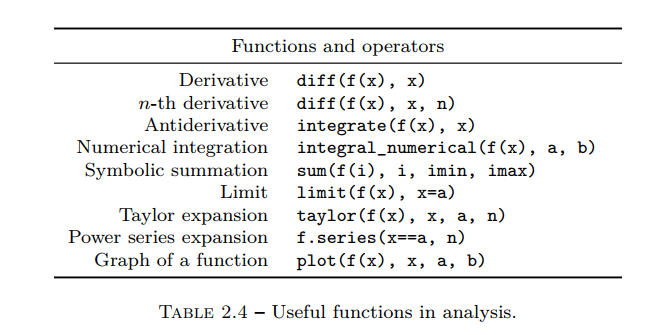

# Limits

Find the limit of:

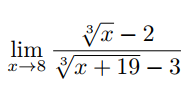

In [2]:
f(x) = (x^(1/3) - 2)/((x + 19)^(1/3) - 3)
f

x |--> (x^(1/3) - 2)/((x + 19)^(1/3) - 3)

In [3]:
limit(f(x), x = 8)

9/4

Limit from left or right:

In [4]:
f(x) = (cos(pi/4 - x) - tan(x))/(1 - sin(pi/4 + x))
f

x |--> -(cos(1/4*pi - x) - tan(x))/(sin(1/4*pi + x) - 1)

In [5]:
ans = limit(f(x), x = pi/4)
ans

Infinity

`dir='plus'` means "limit from above" i.e:

    The limit as x decreases in value approaching a (x approaches a "from the right" or "from above") 

In [6]:
limit(f(x), x = pi/4, dir = 'plus')

-Infinity

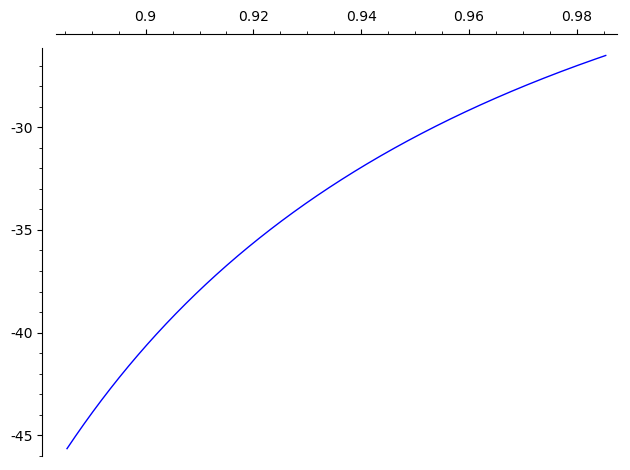

In [7]:
plot(f(x), x, pi/4 + 0.1 , pi/4 + 0.2)

In [8]:
limit(f(x), x = pi/4, dir = 'minus')

+Infinity

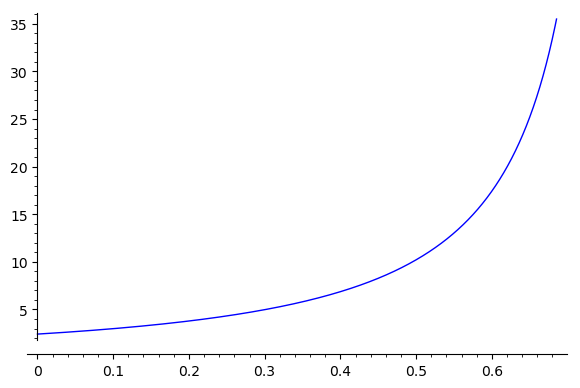

In [9]:
plot(f(x), x, 0, pi/4 - 0.1)

# Vector Valued Functions

In [10]:
t = var('t')

In [11]:
f = vector((2*t-4, t^2, (1/4)*t^3))
f

(2*t - 4, t^2, 1/4*t^3)

In [12]:
type(f)

<class 'sage.modules.free_module.FreeModule_ambient_field_with_category.element_class'>

In [13]:
f(1)

(-2, 1, 1/4)

In [14]:
diff(f(t), t)

(2, 2*t, 3/4*t^2)

In [15]:
g = f(t).diff(t)
g

(2, 2*t, 3/4*t^2)

In [16]:
# g is not a symbolic function!
try:
    g(2)
except ValueError as e:
    print(e)

the number of arguments must be less than or equal to 0


In [17]:
g.substitute(t == 2)

(2, 4, 3)

# Gradient, Hessian and Jacobian

In [18]:
f(x, y) = x^2 + x*y + y^2 - 6*x + 2
f

(x, y) |--> x^2 + x*y + y^2 - 6*x + 2

In [19]:
f.gradient()

(x, y) |--> (2*x + y - 6, x + 2*y)

In [20]:
f.hessian()

[(x, y) |--> 2 (x, y) |--> 1]
[(x, y) |--> 1 (x, y) |--> 2]

In [21]:
f.hessian().det()

(x, y) |--> 3

In [22]:
jacobian(f, (x, y))

[(x, y) |--> 2*x + y - 6     (x, y) |--> x + 2*y]

In [23]:
# jacobian of jacobian gives the hessian
jacobian(jacobian(f, (x, y)), (x, y))

[(x, y) |--> 2 (x, y) |--> 1]
[(x, y) |--> 1 (x, y) |--> 2]

# Line Integrals

In [24]:
from sympy import Curve, line_integrate
import sympy

Example 1:

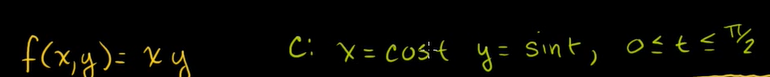

In [25]:
x, y, t = var('x y t')

f(x, y) = x * y
x(t) = cos(t)
y(t) = sin(t)

Define the path/curve:

In [26]:
C = Curve((x(t)._sympy_(), y(t)._sympy_()),
          (t._sympy_(), 0, pi/2))
C

Curve((cos(t), sin(t)), (t, 0, pi/2))

Integrate $f(x, y)$ over the curve!

In [27]:
line_integrate(f(x,y)._sympy_(), C, [sympy.symbols('x'), sympy.symbols('y')])

1/2

[Example 2](https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/line-integrals/v/line-integral-example-2-part-1?modal=1):

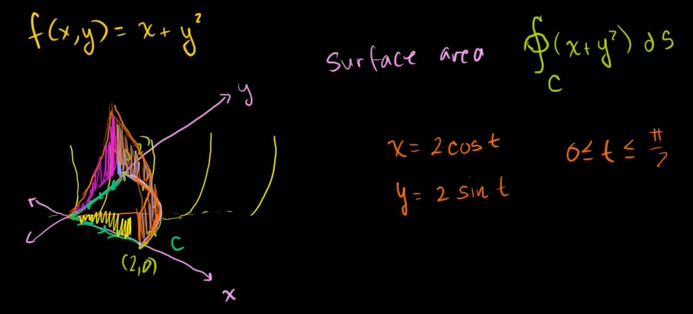

Surface area of orange part:

In [28]:
t = var('t')

f(x, y) = x + y^2
x(t) = 2 * cos(t)
y(t) = 2 * sin(t)

In [29]:
C = Curve((x(t)._sympy_(), y(t)._sympy_()),
          (t._sympy_(), 0, pi/2))

orange_wall = line_integrate(f(x,y)._sympy_(), C, [sympy.symbols('x'), sympy.symbols('y')])
orange_wall

4 + 2*pi

Surface area of the magenta wall:

In [30]:
# parameterization is given in the question

x(t) = 0
y(t) = 2 - t
C = Curve((x(t)._sympy_(), y(t)._sympy_()), (t._sympy_(), 0, 2))

magenta_wall = line_integrate(f(x, y)._sympy_(), C, [sympy.symbols('x'), sympy.symbols('y')])
magenta_wall

8/3

Surface area of the yellow wall:

In [31]:
# parameterization is given in the question

x(t) = t
y(t) = 0
C = Curve((x(t)._sympy_(), y(t)._sympy_()), (t._sympy_(), 0, 2))

yellow_wall = line_integrate(f(x, y)._sympy_(), C, [sympy.symbols('x'), sympy.symbols('y')])
yellow_wall

2

Total surface area:

In [32]:
orange_wall + magenta_wall + yellow_wall

2*pi + 26/3

# Integral of Vector Valued Functions

Eg:

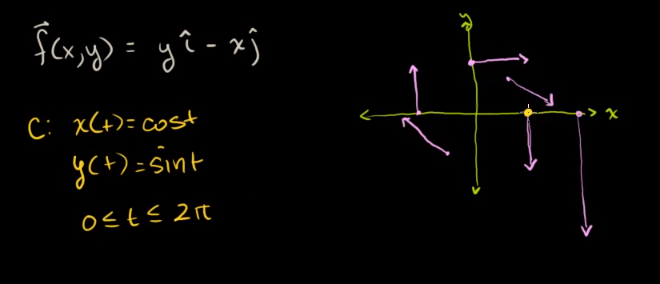

So, to integrate $\vec{f}(x, y)$ on the curve $C$:

In [33]:
import sympy
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate

C = CoordSys3D('C')

t = var('t')._sympy_()
x = var('x')._sympy_()
y = var('y')._sympy_()

region = ParametricRegion((cos(t), sin(t)), (t, 0, 2*pi))
field = C.y * C.i - C.x * C.j

vector_integrate(field, region)

-2*pi

With Maple:

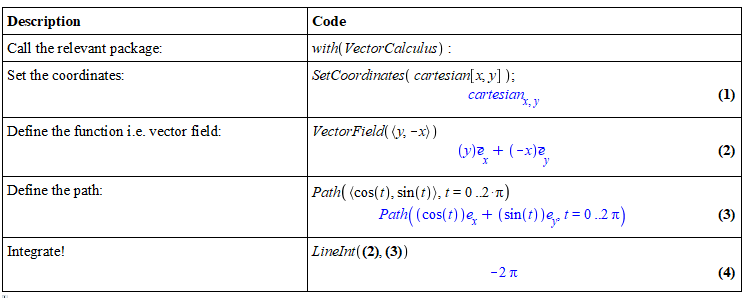

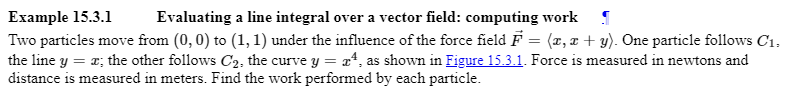

In [34]:
import sympy
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate

C = CoordSys3D('C')

t = var('t')._sympy_()
x = var('x')._sympy_()
y = var('y')._sympy_()

region = ParametricRegion((t, t), (t, 0, 1))
field = C.x * C.i + (C.x+C.y) * C.j

vector_integrate(field, region)

3/2

With Maple:

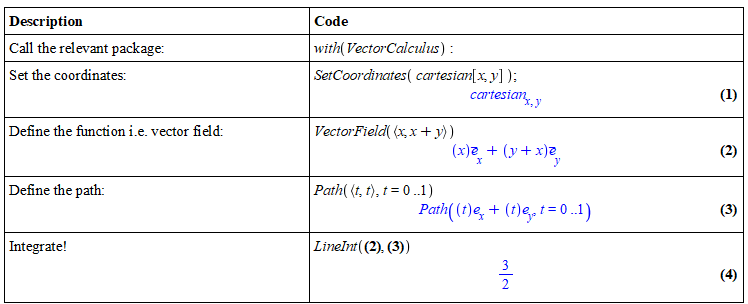

# Vector Calculus and Vector Fields

Define a 2D Euclidean space with coordinates x, y (using the SageMath operator "<,>":

In [35]:
E.<x,y> = EuclideanSpace(coordinates='Cartesian')
E

Euclidean plane E^2

To view the unit vectors:

In [36]:
E.default_frame()

Coordinate frame (E^2, (e_x,e_y))

To define a vector field e.g. $f(x,y) = y.\hat{i} - x.\hat{j}$:

In [37]:
v = E.vector_field(y, -x, name = 'v')
v.display()

v = y e_x - x e_y

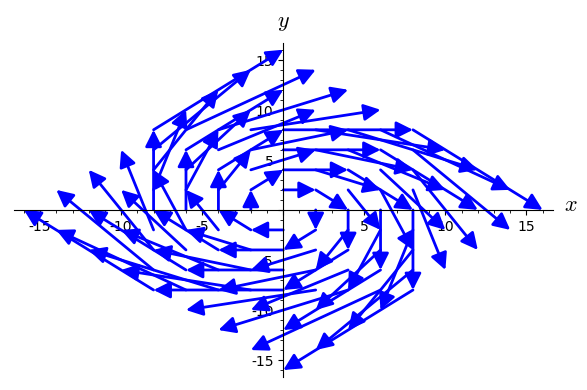

In [38]:
v.plot()

Note: Standard linear algebra operations can be performed on vector fields

The norm of a vector:

In [39]:
norm(v).display()

|v|: E^2 --> R
   (x, y) |--> sqrt(x^2 + y^2)

In [40]:
norm(v)^2 == v.dot(v)

True

But to actually do the computation, you need a symbolic expression:

In [41]:
norm(v).expr()(2, 3)

sqrt(13)

To create a value at a specific point e.g. (x, y) = (2, 3):

In [42]:
p = E((2, 3), name = 'p')
p.coord()

(2, 3)

To evaluate the value of $p$ at the vector field v:

In [43]:
v.at(p).display()

v = 3 e_x - 2 e_y

In [44]:
a = v.at(p)